In [1]:
# import my library
import network_analysis as net
import networkx as nx
%matplotlib inline

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# set some filepaths for network creation
control_of = r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\ChR2_Small_Box.csv'
ChR2_of = r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\Control_Small_Box.csv'

[[ 1.          0.64285714  0.9047619  ...  0.57142857  0.40719293
   0.88095238]
 [ 0.64285714  1.          0.73809524 ...  0.9047619   0.43114545
   0.52380952]
 [ 0.9047619   0.73809524  1.         ...  0.76190476  0.40719293
   0.83333333]
 ...
 [ 0.57142857  0.9047619   0.76190476 ...  1.          0.2874303
   0.5       ]
 [ 0.40719293  0.43114545  0.40719293 ...  0.2874303   1.
  -0.01197626]
 [ 0.88095238  0.52380952  0.83333333 ...  0.5        -0.01197626
   1.        ]]
[[ 0.          0.64285714  0.9047619  ...  0.57142857  0.40719293
   0.88095238]
 [ 0.64285714  0.          0.73809524 ...  0.9047619   0.43114545
   0.52380952]
 [ 0.9047619   0.73809524  0.         ...  0.76190476  0.40719293
   0.83333333]
 ...
 [ 0.57142857  0.9047619   0.76190476 ...  0.          0.2874303
   0.5       ]
 [ 0.40719293  0.43114545  0.40719293 ...  0.2874303   1.
  -0.01197626]
 [ 0.88095238  0.52380952  0.83333333 ...  0.5        -0.01197626
   0.        ]]


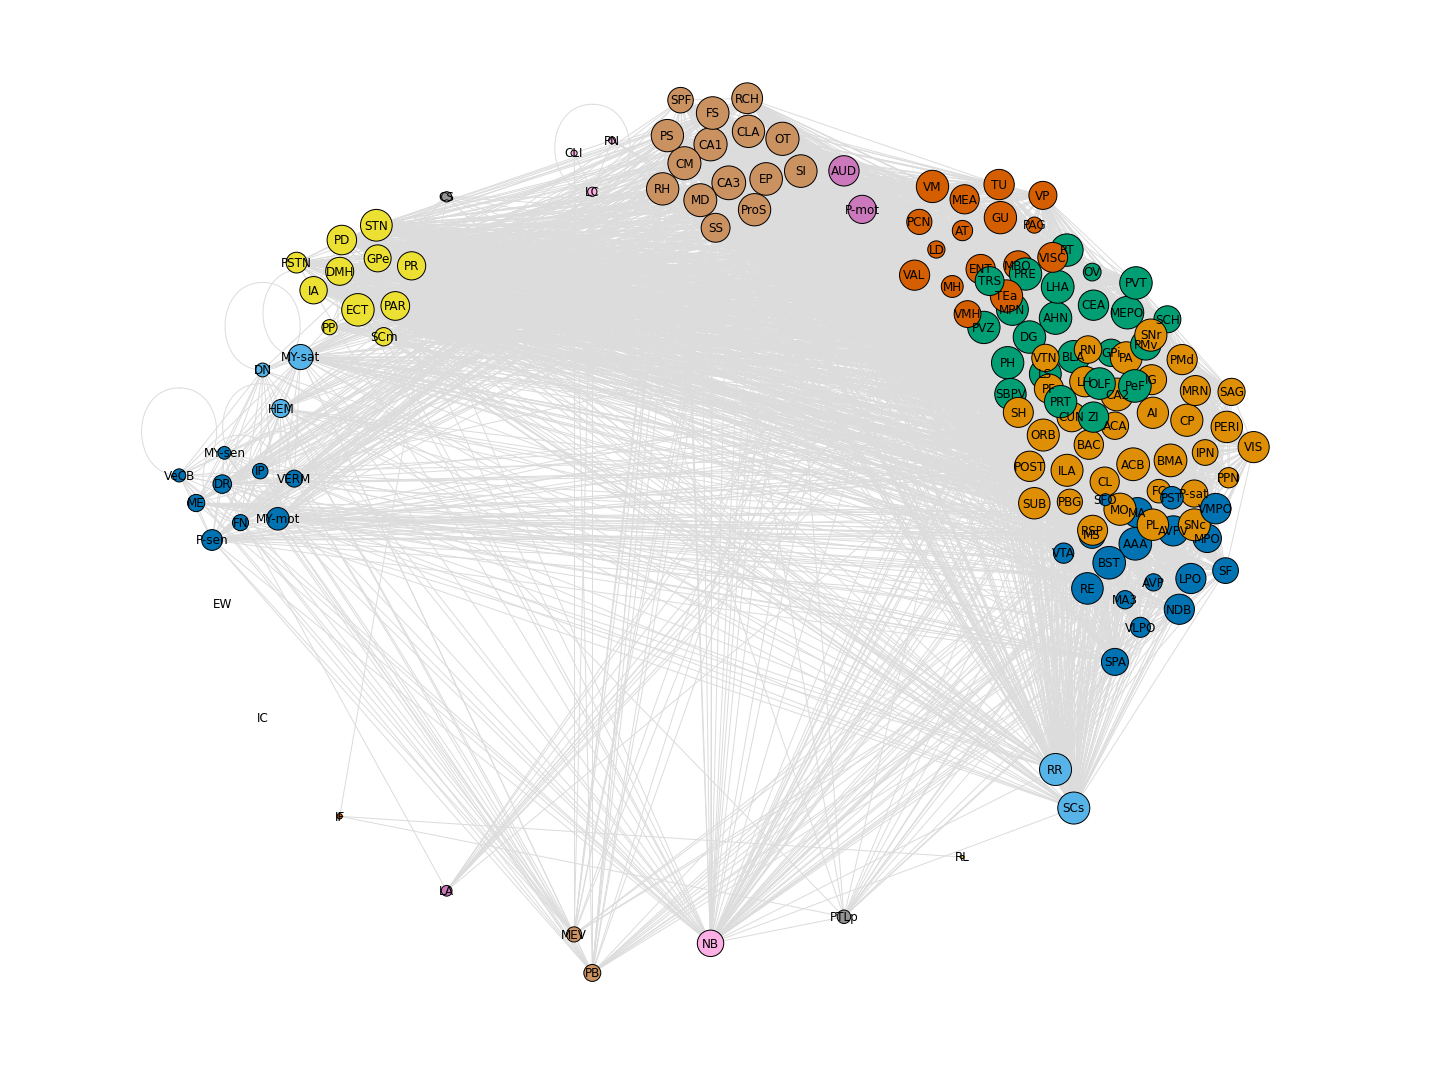

In [13]:
# control_of network
control_data, control_nodes = net.loadData(control_of)
control_rvals, p  = net.corrMatrix(control_data, corr_type='Spearman', z_trans=False)
print(control_rvals)
control_threshold_matrix = net.significanceCheck(p, control_rvals, 1, names=control_nodes, include_Negs=True)
print(control_threshold_matrix)
control_per = net.percentile(control_threshold_matrix, 0.5)
control_G = net.networx(control_per, control_nodes)
df, control_mark_clust, _ = net.markov(control_G, control_nodes)
control_color_list = net.grab_color_attributes(control_mark_clust, control_nodes)
control_pos_dict = net.get_position_data(control_mark_clust, control_nodes)
net.graph_network(control_G, list(control_color_list.values()), control_pos_dict)

In [ ]:
print(control_threshold_matrix)

In [5]:
control_hub = net.findMyHubs(net.grab_node_attributes(control_G, compress_to_df=True))
control_hub

(        Degree  Betweenness  Eigenvector_Centrality  Closeness  \
 AAA   0.287671     0.000215                0.052275   0.584000   
 ACA   0.575342     0.002201                0.088515   0.701923   
 ACB   0.239726     0.000099                0.046895   0.568093   
 AHN   0.287671     0.000181                0.053958   0.584000   
 AI    0.335616     0.000309                0.060782   0.600823   
 ...        ...          ...                     ...        ...   
 VP    0.513699     0.001702                0.080799   0.672811   
 VTA   0.760274     0.006928                0.105412   0.806630   
 VTN   0.575342     0.002544                0.087976   0.701923   
 VeCB  0.883562     0.012001                0.114548   0.895706   
 ZI    0.363014     0.000421                0.063755   0.610879   
 
       Clustering_Coefficient  Hub_Score  
 AAA                 0.782811          1  
 ACA                 0.680149          0  
 ACB                 0.803361          1  
 AHN                 0

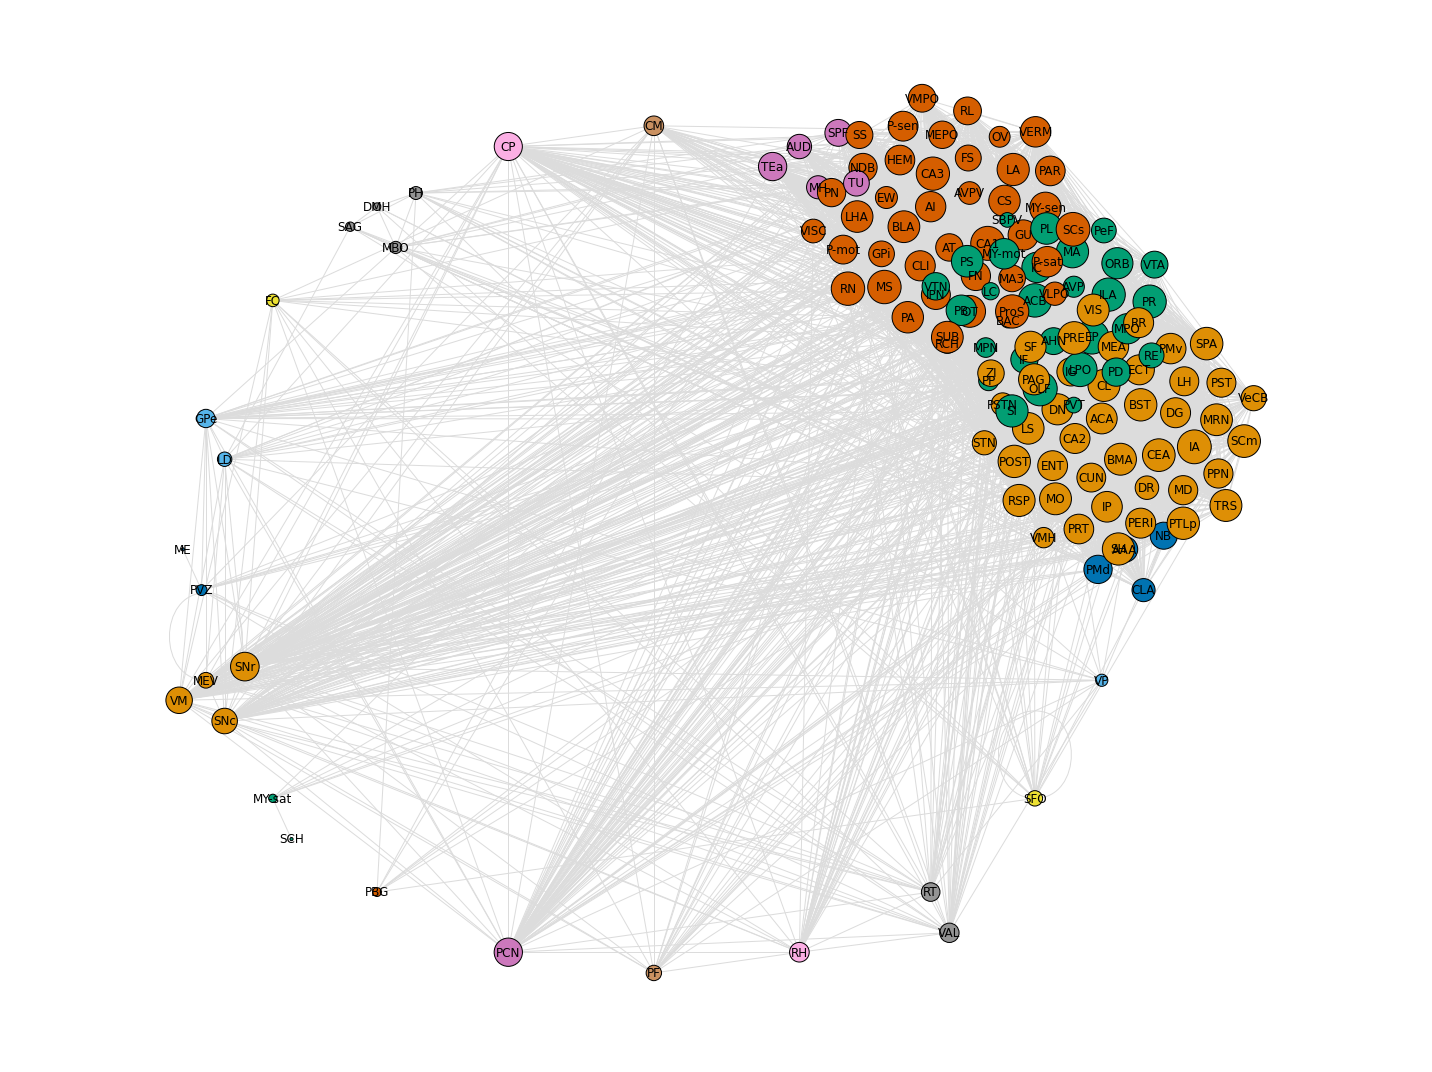

In [15]:
# ChR2 OF network
ChR2_data, ChR2_nodes = net.loadData(ChR2_of)
ChR2_rvals, p = net.corrMatrix(ChR2_data, corr_type='Spearman', z_trans=False)
ChR2_threshold_matrix = net.significanceCheck(p, ChR2_rvals, 1, names=ChR2_nodes, include_Negs=True)
ChR2_per = net.percentile(ChR2_threshold_matrix, 0.5)
ChR2_G = net.networx(ChR2_per, ChR2_nodes)
df1,ChR2_mark_clust,_ = net.markov(ChR2_G, ChR2_nodes)
ChR2_color_list = net.grab_color_attributes(ChR2_mark_clust, ChR2_nodes)
ChR2_pos_dict = net.get_position_data(ChR2_mark_clust, ChR2_nodes)
net.graph_network(ChR2_G, list(ChR2_color_list.values()), ChR2_pos_dict)

In [18]:
chr2_hub = net.findMyHubs(net.grab_node_attributes(ChR2_G, compress_to_df=True))
chr2_hub

(        Degree  Betweenness  Eigenvector_Centrality  Closeness  \
 AAA   0.458904     0.006353                0.064971   0.643172   
 ACA   0.657534     0.002452                0.099647   0.737374   
 ACB   0.773973     0.005679                0.112098   0.806630   
 AHN   0.500000     0.006379                0.068456   0.648889   
 AI    0.636986     0.002601                0.096022   0.719212   
 ...        ...          ...                     ...        ...   
 VP    0.102740     0.000690                0.008844   0.501718   
 VTA   0.500000     0.002985                0.069826   0.657658   
 VTN   0.520548     0.002628                0.075279   0.666667   
 VeCB  0.438356     0.005241                0.066164   0.629310   
 ZI    0.486301     0.003335                0.070116   0.648889   
 
       Clustering_Coefficient  Hub_Score  
 AAA                 0.744912          1  
 ACA                 0.786184          0  
 ACB                 0.710967          1  
 AHN                 0

In [ ]:
# compare some group metrics

#GE
control_of_GE = nx.global_efficiency(control_G)
ChR2_of_GE = nx.global_efficiency(ChR2_G)

#LE
control_of_LE = nx.local_efficiency(control_G)
ChR2_of_LE = nx.local_efficiency(ChR2_G)

print(control_of_GE)
print(ChR2_of_GE)
print(control_of_LE)
print(ChR2_of_LE)



In [ ]:
#sigma male grindset
control_of_Sigma = nx.sigma(control_G)
ChR2_of_Sigma = nx.sigma(ChR2_G)

# #omega male grindset
# control_of_omega = nx.omega(control_G)
# ChR2_of_omega = nx.omega(ChR2_G)

print(control_of_Sigma)
print(ChR2_of_Sigma)
# print(control_of_omega)
# print(ChR2_of_omega)